In [3]:
import pandas as pd
df = pd.read_excel("../data/datasheet.xlsx")
df.to_csv("../data/raw_real_estate_data.csv", index=False)
#Converted the excel sheet data to CSV file 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("../data/raw_real_estate_data.csv", header=4)# Loading with proper header 


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]# Dropping unnamed/empty columns

print(df.shape)
print(df.columns)
print(df.head())

df.to_csv("../data/processed_real_estate_data.csv", index=False)

(616, 12)
Index([' Date', ' Address', ' Number of rooms', ' Price, RUR', ' Layout',
       ' Floor', ' Total area, m2', ' Living area, m2', ' Kitchen area, m2',
       ' Additional description', ' Contacts', ' Address on the website'],
      dtype='object')
                Date               Address        Number of rooms  Price, RUR  \
0   27.06.2025 16:20         Lenin Ave., 3               Two-room   2,900,000   
1   26.04.2025 05:00           Soviet, 168               Two-room   3 600 000   
2   07.06.2025 23:17   Karl Marx Ave., 191   Three-room apartment   6,090,000   
3   01.07.2025 11:00     Green Log St., 25               One-room   2,090,000   
4   01.07.2025 10:08    Stalevarov st., 26               Two-room   2 620 000   

          Layout  Floor Total area, m2 Living area, m2 Kitchen area, m2  \
0   Khrushchevka    4/5          45,00           27.00             6.00   
1            NaN    5/9          50,00           32,00             8.50   
2       improved    3/9       

In [5]:
df.isnull().sum().sort_values(ascending=False) #Checking for null values 

df[' Layout'] = df[' Layout'].fillna('Not specified')# Filling categorical with 'Not specified'

df[' Number of rooms'] = df[' Number of rooms'].fillna('Unknown')# Filling categorical with 'Unknown'

df[' Additional description'] = df[' Additional description'].fillna('')# Filling text column with empty string

df = df.dropna(subset=[' Price, RUR'])# Dropping the row with missing target value

df.isnull().sum()

df.to_csv("../data/processed_real_estate_data.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0    Date                    615 non-null    object
 1    Address                 615 non-null    object
 2    Number of rooms         615 non-null    object
 3    Price, RUR              615 non-null    object
 4    Layout                  615 non-null    object
 5    Floor                   615 non-null    object
 6    Total area, m2          615 non-null    object
 7    Living area, m2         615 non-null    object
 8    Kitchen area, m2        615 non-null    object
 9    Additional description  611 non-null    object
 10   Contacts                615 non-null    object
 11   Address on the website  615 non-null    object
dtypes: object(12)
memory usage: 57.8+ KB

Null values after conversion:
Price, RUR          0
Total area, m2      0
Living area, m2     0
Kitchen area, 

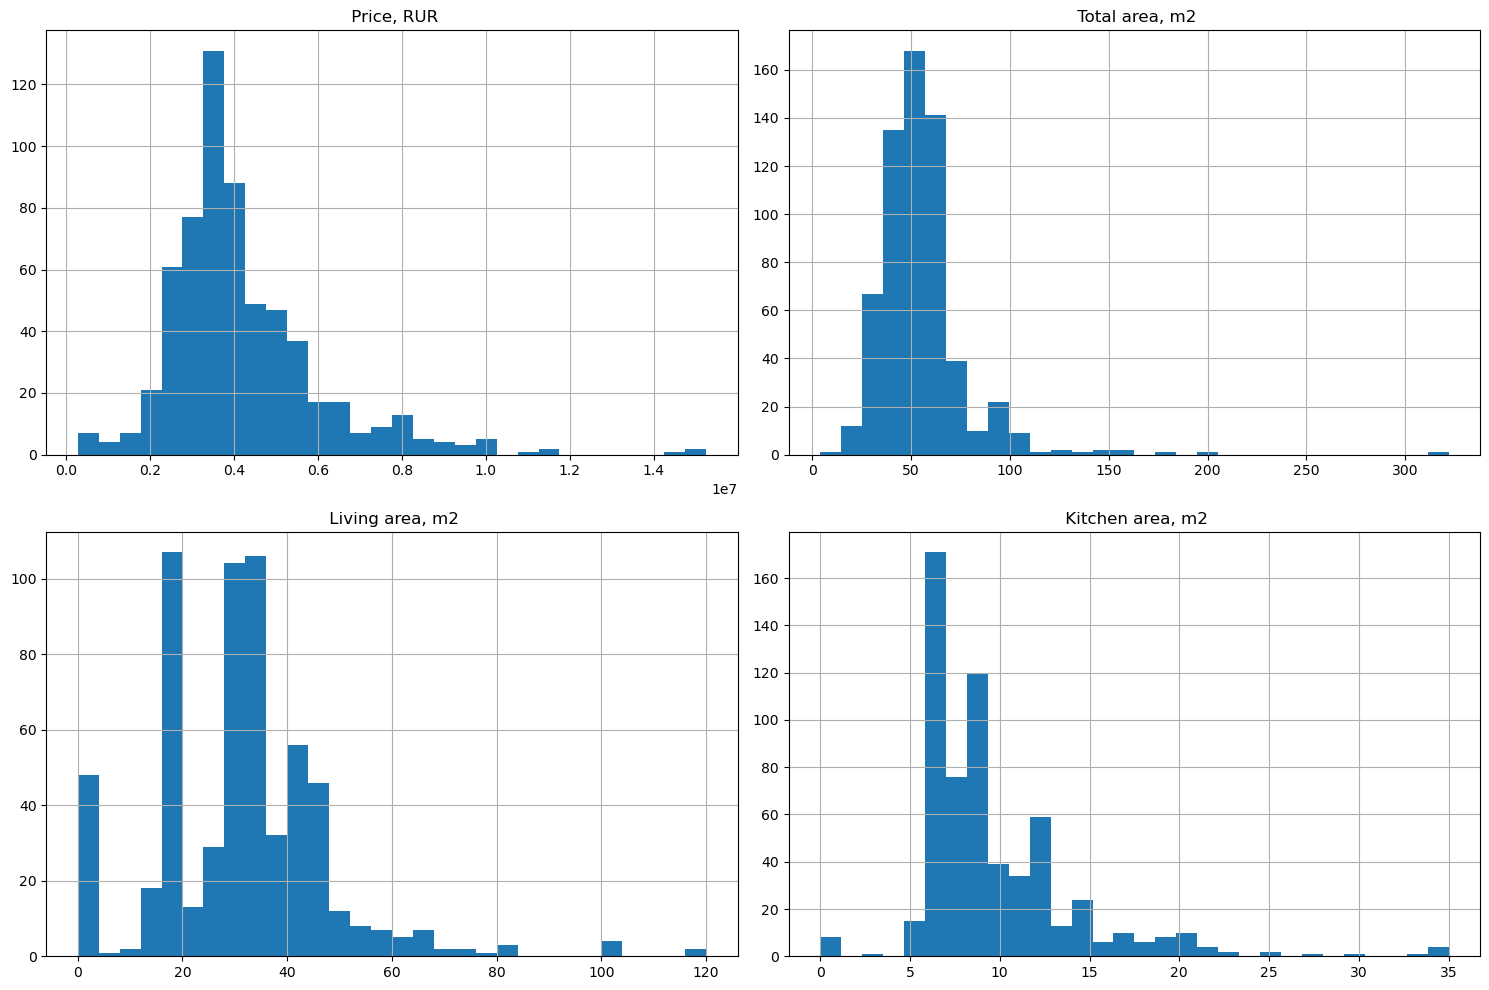

In [6]:
df = pd.read_csv("../data/processed_real_estate_data.csv")
df.duplicated().sum()
df = df.drop_duplicates() #getting the number of duplicated values and dropping them

df.info()
df.describe()

cols_to_fix = [' Price, RUR', ' Total area, m2', ' Living area, m2', ' Kitchen area, m2']


#cleaning value
def clean_value(val, is_price=False):
    try:
        val = str(val).strip()
        if is_price:
            val = val.replace(',', '').replace(' ', '')
        else:
            val = val.replace(':', '.').replace(',', '.').replace(' ', '')
        return float(val)
    except:
        return np.nan

# Apply cleaning
for col in cols_to_fix:
    if col == ' Price, RUR':
        df[col] = df[col].apply(lambda x: clean_value(x, is_price=True))
    else:
        df[col] = df[col].apply(clean_value)

# Checking nulls
print("\nNull values after conversion:")
print(df[cols_to_fix].isnull().sum())

# Plotting histograms
df[cols_to_fix].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()



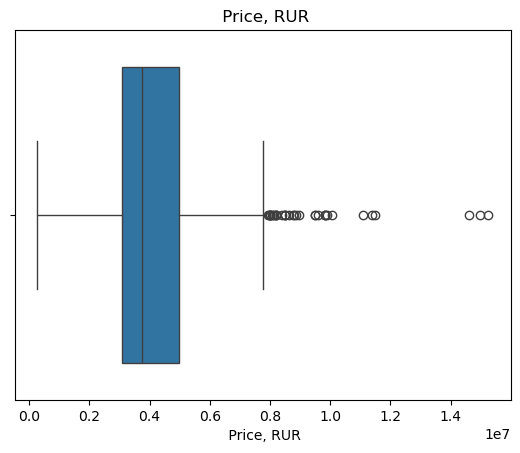

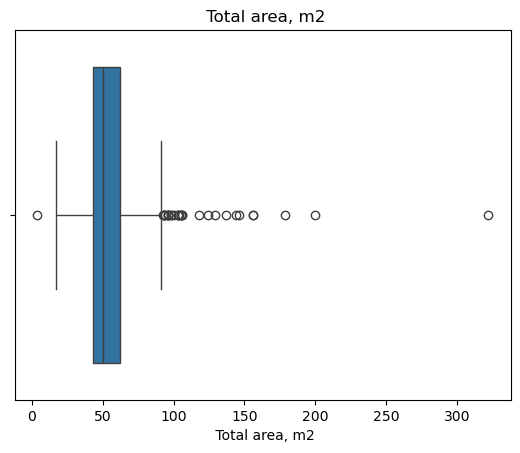

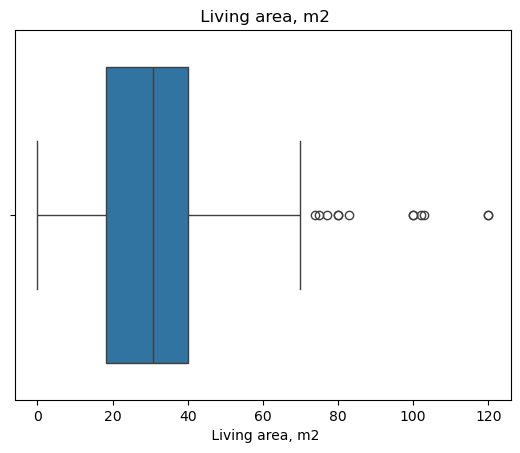

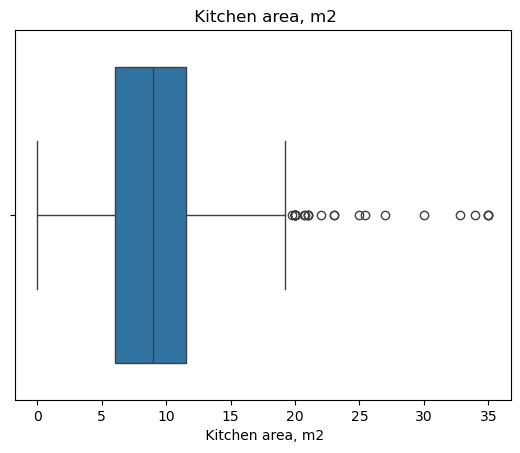

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [11]:
#Checking the range distribution of data 
for col in [' Price, RUR', ' Total area, m2', ' Living area, m2', ' Kitchen area, m2', ' Number of rooms']:
    print(col, "→", df[col].min(), "-", df[col].max())


 Price, RUR → 275000.0 - 15250452.0
 Total area, m2 → 4.0 - 322.0
 Living area, m2 → 0.0 - 120.0
 Kitchen area, m2 → 0.0 - 35.0
 Number of rooms →  Four-room apartment - Unknown


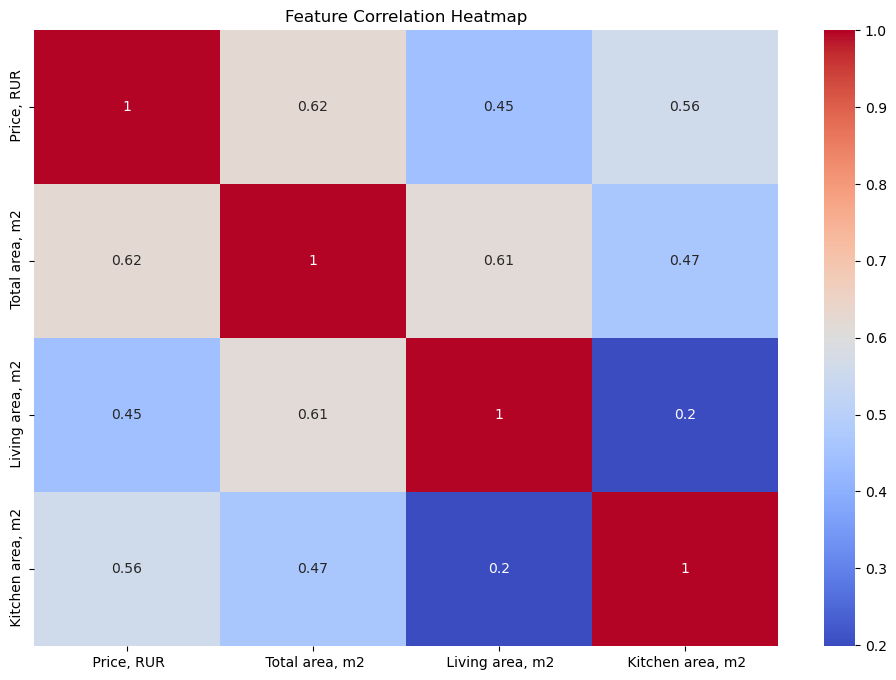

In [12]:
# Plotting a heatmap featuring Correlation between the numeric values 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



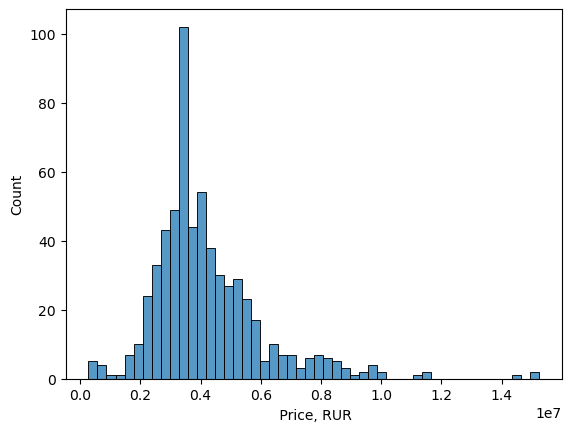

In [97]:
df[' Price, RUR'].describe()
sns.histplot(df[' Price, RUR'], bins=50)
plt.show()



In [98]:
df.to_csv('../data/final_processed_real_estate_data.csv',index=False) # Saving the final dataset 
